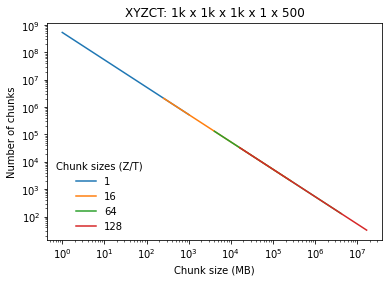

In [3]:
##### %matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math

x = 1024
y = 1024
z = 1024
t = 512
c = 1
chunkSizes = [32, 64, 128, 256, 512, 1024]
chunkT = 256
chunkZ = 512
testNum = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('Chunk size (MB)')
plt.ylabel('Number of chunks')
plt.title("XYZCT: 1k x 1k x 1k x 1 x 500");

for chunkT in (1, 16, 64, 128):
    chunkZ = chunkT
    numFiles = []
    fileSize = []
    for i in chunkSizes:
        numFiles.__iadd__([(math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/chunkZ) * math.ceil(t/chunkT) * math.ceil(c/1))])
        fileSize.__iadd__([int((i * i * chunkZ * chunkT) / 1024)])
    line, = ax.plot(fileSize, numFiles, label=f"{chunkT}")

plt.legend(loc="lower left", title="Chunk sizes (Z/T)", frameon=False)

def update(chunkZ, chunkT, displayMB, reScaleAxis):
    global line
    numFiles = []
    fileSize = []
    for i in chunkSizes:
        numFiles.__iadd__([(math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/chunkZ) * math.ceil(t/chunkT) * math.ceil(c/1))])
        fileSize.__iadd__([int((i * i * chunkZ * chunkT) / 1024)])
    if displayMB:
        plt.xlabel('Chunk Size X and Y (MB)')
        line.set_xdata(fileSize)
    else:
        plt.xlabel('Chunk Size X and Y')
        line.set_xdata(chunkSizes)
    line.set_ydata(numFiles)
    if reScaleAxis:
        ax.relim()
        ax.autoscale_view()
    for i in range(len(numFiles)):
        print("X and Y chunk size:", chunkSizes[i], "    Number of files:", numFiles[i],"    Size in MB:", fileSize[i])
    fig.canvas.draw_idle()

def scale(scale):
    plt.yscale(scale)
    plt.xscale(scale)

scale('log')
#interact(scale, scale=['linear','log']);
#interact(update, chunkZ = (1,1024), chunkT = (1,512), displayMB=True, reScaleAxis=True);
